<a href="https://colab.research.google.com/github/pearllpatell/Pearl_Patel_Portfolio/blob/main/Supermarket%20Sales%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supermarket Sales Analysis



#### This dataset was found on Kaggle.
https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

 "The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data."

 As this was a premade dataset I found to create my analysis on, the data between the branches are very similar. However, I have conducted the very small differences on each visual and conclusion.

In [24]:
#Importing the correct libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Loading the data
sm = pd.read_csv('supermarketsales.csv')

#Finding the missing value
No values were missing from the data as all came back false and at 0.

In [49]:
#Find the missing value
sm.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
sm.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#Printing the column names
This shows all the columns and data types with the dataset. Makes it easier for future coding to not have to pull up the spreadsheet and understand what is needed.

In [15]:
#Printing the column names
for col in sm.columns:
    print(col)

Invoice ID
Branch
City
Customer type
Gender
Product line
Unit price
Quantity
Tax 5%
Total
Date
Time
Payment
cogs
gross margin percentage
gross income
Rating


In [48]:
sm.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

#Calculating the sum, mean, and gross income.
This helps differenciate the different city branches to understand where the most income is coming in and where the most units are being sold.
As you can see the most units are being sold in Yangon.
Yangon is also having the most gross income within all the branches.

In [35]:
#Calculate the sum and mean per unit price and quanitity with each city branch.
city_aggregates = sm.groupby('City').agg({
    'Unit price': ['sum', 'mean'],
    'Quantity': ['sum', 'mean']
})
print(city_aggregates)

          Unit price            Quantity          
                 sum       mean      sum      mean
City                                              
Mandalay    18478.88  55.659277     1820  5.481928
Naypyitaw   18567.76  56.609024     1831  5.582317
Yangon      18625.49  54.780853     1859  5.467647


In [37]:
#Calculate the gross income per city
gross_income_per_city = sm.groupby('City')['gross income'].sum()
print(gross_income_per_city)

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64


#Visual Datasets

#Branch Sales
### The A, B, and C indicates the different store branches that are located. In this dataset, the three different branches are in the cities Yangon (A), Mandalay(B), and Naypyitaw (C).

The branch that gets the most visits is Branch A, Yangon. However, there is no significant difference between which branch gets more sales.
The branch that is generating the most sales is Yangon with 34% of all of the different city data.

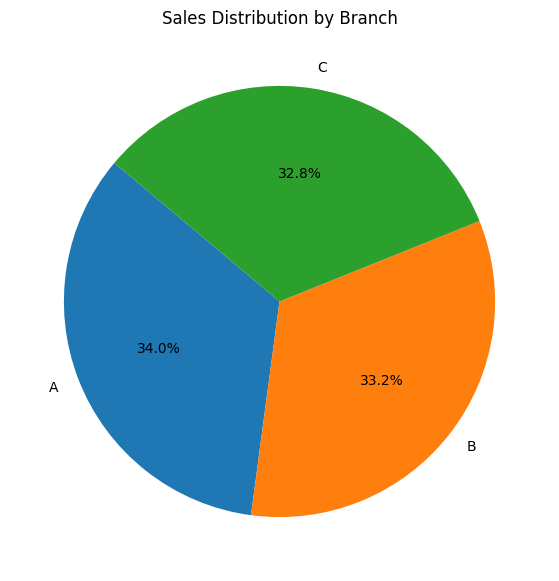

In [16]:
# Pie chart for "Branch" column
branch_counts = df['Branch'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(branch_counts, labels=branch_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Branch')
plt.show()

#Genders that visit most
The gender that visit the stores more are women, however, it is only by the count of 2. Which means that it is pretty even.
If we were to analyze future steps of where to target, we would target both genders as they both come into the store more.

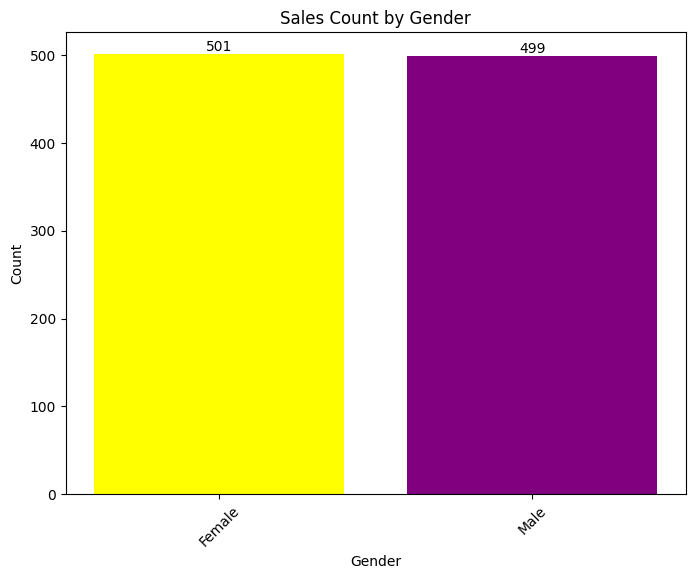

In [46]:
# Bar chart for "Gender" column
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['yellow', 'purple'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Sales Count by Gender')
plt.xticks(rotation=45)
for i, value in enumerate(gender_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

#Payment Methods Used Most
The payment method that is used the most is Ewallet, with a close second of cash. Since all the payment methods work, there is no worries of changing the methods accepted in store.

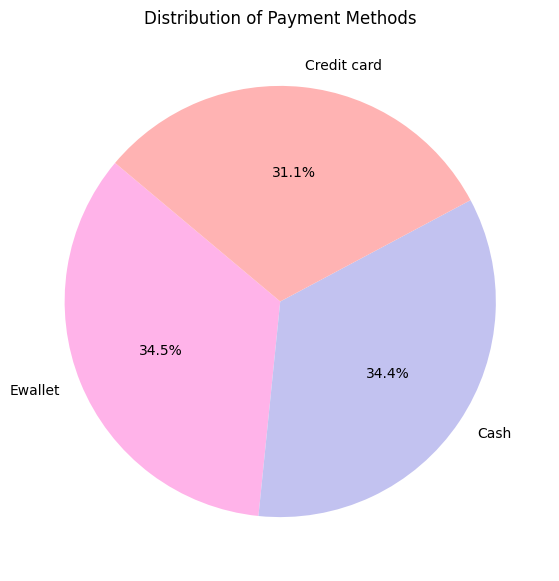

In [43]:
# Pie chart for "Payment"
payment_counts = df['Payment'].value_counts()
colors = ['#ffb3e9', '#c2c2f0', '#ffb3b3']  #changing the colors to make it different from the previous pie chart
plt.figure(figsize=(10, 7))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Payment Methods')
plt.show()

In [47]:
sm['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

#Customer Type
More than half are members. With this data, you can show that we have a lot of non-members coming in. We can push to have more marketing to have more customers register as members.

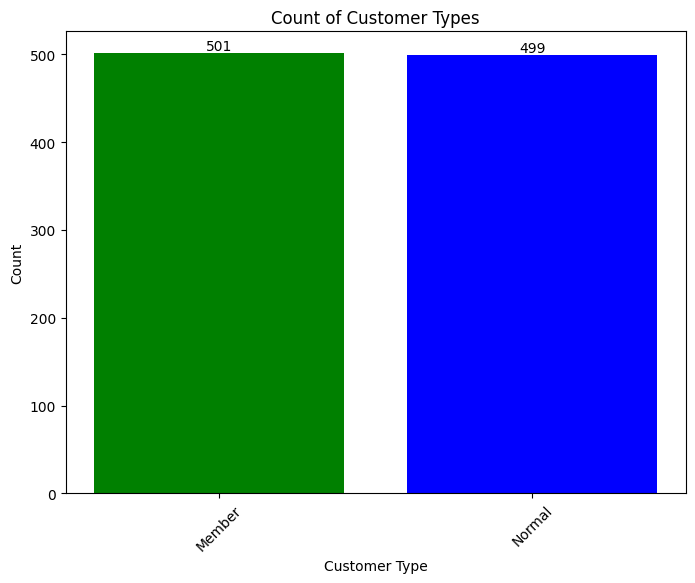

In [44]:
# Bar chart for "Customer Type" column
customer_type_counts = df['Customer type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(customer_type_counts.index, customer_type_counts.values, color=['green', 'blue'])
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Count of Customer Types')
plt.xticks(rotation=45)
for i, value in enumerate(customer_type_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

#Product line
Based on the chart, the most product line that is sold are fashion accessories and with a close second are food and beverages.


<ipython-input-26-364092e14516>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Product line', data=sm,  palette="Set1", saturation =1).set_title('Highest and Lowest Sold Product Line')


Text(0.5, 1.0, 'Highest and Lowest Sold Product Line')

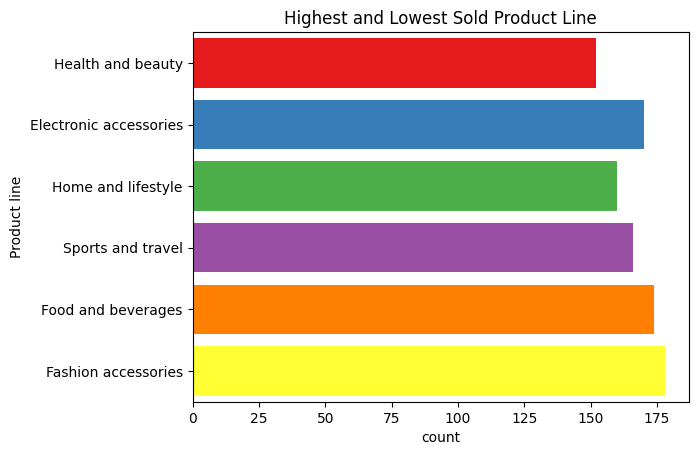

In [26]:
sns.countplot(y='Product line', data=sm,  palette="Set1", saturation =1).set_title('Highest and Lowest Sold Product Line')


In [52]:
sm['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64